In [1]:
import os
import matplotlib.pyplot as plt
from scipy.io import wavfile
import kapre
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda, Permute
from kapre.time_frequency import Melspectrogram, Spectrogram

plt.style.use('ggplot')

In [2]:
stft_model = Sequential()
stft_model.add(Spectrogram(n_dft=512, n_hop=160, input_shape=(1,16000),
                           return_decibel_spectrogram=True,
                           trainable_kernel=False, name='spectrogram'))

mel_model = Sequential()
mel_model.add(Melspectrogram(sr=16000, n_mels=128, 
              n_dft=512, n_hop=160, input_shape=(1,16000), 
              return_decibel_melgram=True,
              trainable_kernel=False, name='melspectrogram'))

/home/seth/anaconda3/envs/audio/lib/python3.7/site-packages/librosa/filters.py:196: FutureWarning: norm=1 behavior will change in librosa 0.8.0. To maintain forward compatibility, use norm='slaney' instead.
  FutureWarning)


In [3]:
def plot_signals_time(titles, signals):
    
    nrows, ncols = 2, 5
    fig, ax = plt.subplots(nrows, ncols, figsize=(16, 6))
    
    z = 0
    for i in range(nrows):
        for y in range(ncols):
            ax[i,y].set_title(titles[z])
            ax[i,y].plot(signals[z])
            ax[i,y].set_xticks([])
            ax[i,y].set_yticks([])
            ax[i,y].grid(False)
            z += 1
    
    plt.show()

In [4]:
def plot_spectrogram(titles, signals, title, shape=(16,8)):
    nrows, ncols = 2, 5
    fig, ax = plt.subplots(nrows, ncols, figsize=shape)
    fig.suptitle(title, size=20)
    plt.set_cmap('inferno')
    
    z = 0
    for i in range(nrows):
        for y in range(ncols):
            ax[i,y].set_title(titles[z])
            ax[i,y].imshow(signals[z].squeeze())
            ax[i,y].set_xticks([])
            ax[i,y].set_yticks([])
            ax[i,y].grid(False)
            z += 1
    
    plt.show()

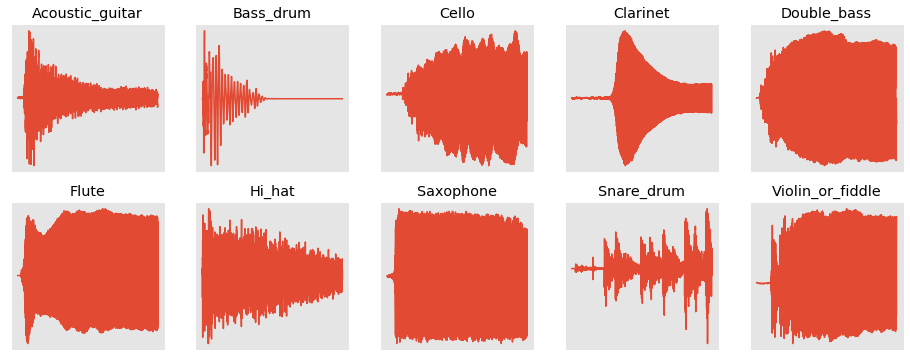

In [5]:
src_root = '../clean'

classes = os.listdir(src_root)
signals = []
titles = []
stft_specs = []
mel_specs = []

for _cls in sorted(classes):
    for fn in sorted(os.listdir(os.path.join(src_root, _cls))):
        rate, wav = wavfile.read(os.path.join(src_root, _cls, fn))
        signals.append(wav)
        titles.append(_cls)
        
        wav = wav.reshape(1, 1, -1)
        spec = stft_model.predict(wav)
        mel = mel_model.predict(wav)
        stft_specs.append(spec)
        mel_specs.append(mel)
        break

plot_signals_time(titles, signals)

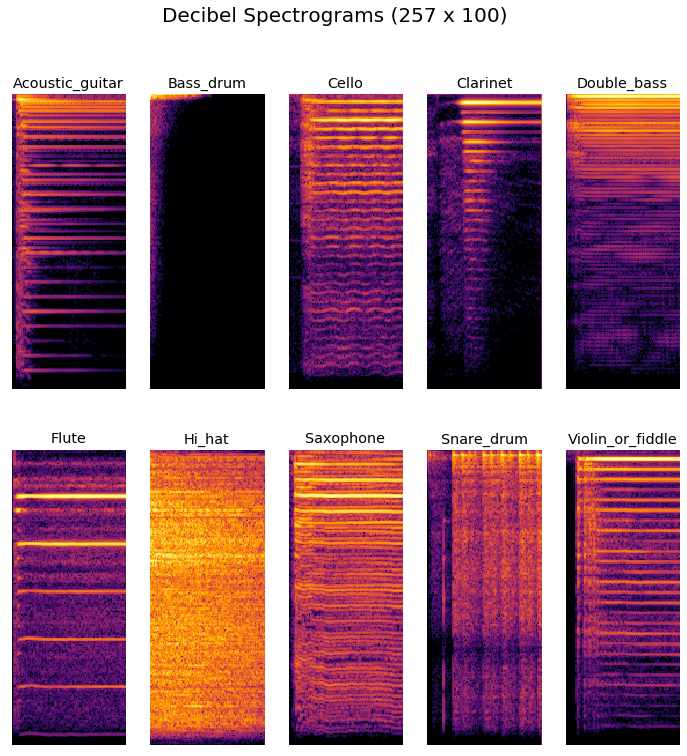

In [6]:
plot_spectrogram(titles, stft_specs, title= 'Decibel Spectrograms (257 x 100)',shape=(12,12))

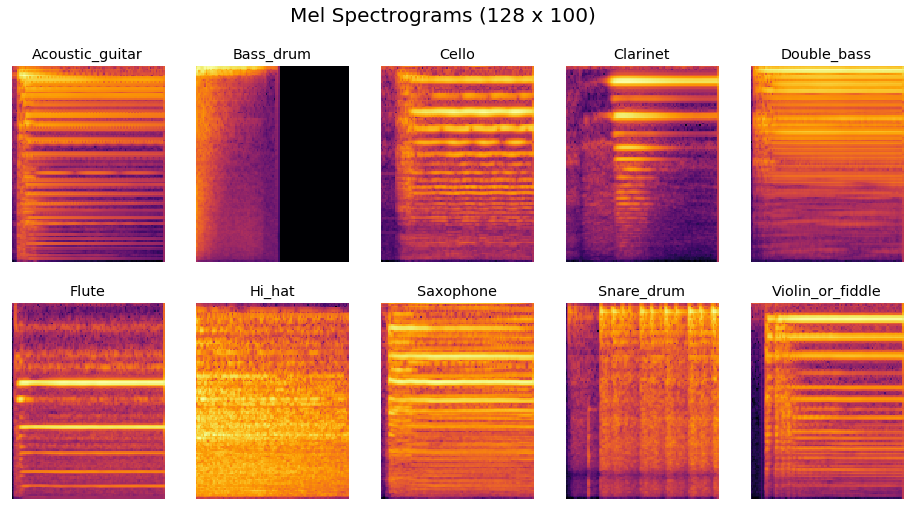

In [7]:
plot_spectrogram(titles, mel_specs, title='Mel Spectrograms (128 x 100)', shape=(16,8))

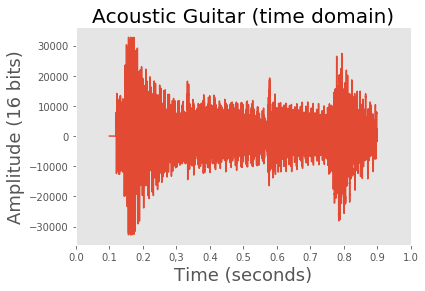

In [8]:
rate, wav = wavfile.read(os.path.join(src_root, 'Acoustic_guitar', '0eeaebcb_0.wav'))

plt.plot(wav)
plt.title('Acoustic Guitar (time domain)', size=20)
plt.grid(False)
locs, labels = plt.xticks()
plt.xticks(locs, ['0.0', '0.1', '0.2', '0,3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0', ''])
plt.ylabel('Amplitude (16 bits)', size=18)
plt.xlabel('Time (seconds)', size=18)
plt.show()

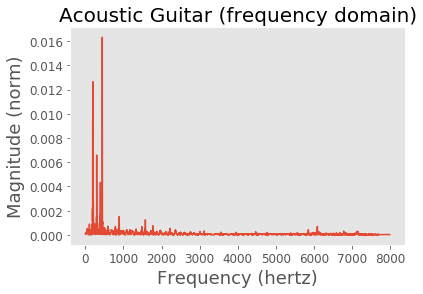

In [9]:
fft = np.fft.rfft(wav)
plt.plot(np.abs(fft)/np.sum(np.abs(fft)))
plt.title('Acoustic Guitar (frequency domain)', size=20)
plt.grid(False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Magnitude (norm)', size=18)
plt.xlabel('Frequency (hertz)', size=18)
plt.show()